In [218]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [219]:
#creating a synthetic dataset
from sklearn.datasets import make_classification


x, y = make_classification(n_samples = 1000, n_features = 2, n_classes = 2, n_clusters_per_class = 2, n_redundant = 0)

In [220]:
print(x)

[[-1.08970545 -0.85226705]
 [-0.95281461  1.03901743]
 [ 0.37939828 -0.71130541]
 ...
 [-0.84283942  1.13264407]
 [-1.23548833  1.45862204]
 [-0.8691595  -1.09461335]]


In [221]:
print(y)

[0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0
 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0
 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0
 0 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1
 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1
 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0
 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1
 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1
 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1
 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1
 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0
 1 0 0 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1
 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0
 0 1 0 0 1 0 0 0 0 1 1 1 

In [222]:
x.shape

(1000, 2)

In [223]:
y.shape

(1000,)

In [224]:
pd.DataFrame(x)[0]

0     -1.089705
1     -0.952815
2      0.379398
3     -1.050514
4     -1.073548
         ...   
995   -0.946608
996    0.759580
997   -0.842839
998   -1.235488
999   -0.869160
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

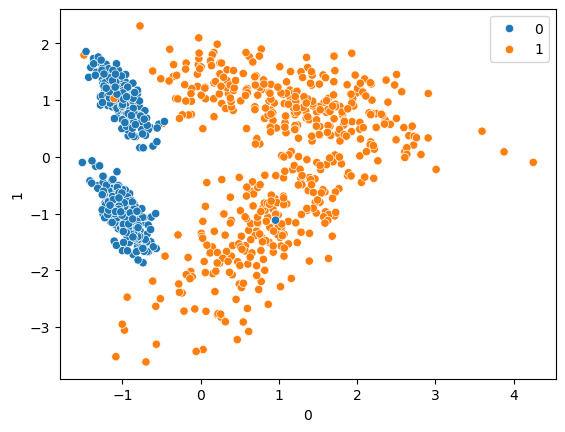

In [225]:
sns.scatterplot(
    x = pd.DataFrame(x)[0],
    y = pd.DataFrame(x)[1],
    hue = y
)

In [226]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 10)
svc = SVC(kernel = 'linear')
svc.fit(x_train, y_train)

svc.coef_

array([[3.31941653, 0.0234644 ]])

In [227]:
y_pred = svc.predict(x_test)

In [228]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[126   0]
 [  5 119]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       126
           1       1.00      0.96      0.98       124

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



In [229]:
rbf = SVC(kernel = 'rbf')
rbf.fit(x_train, y_train)

y_pred = rbf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[126   0]
 [  0 124]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       126
           1       1.00      1.00      1.00       124

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [230]:
polynomial = SVC(kernel = 'poly')
polynomial.fit(x_train, y_train)

y_pred = polynomial.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[126   0]
 [ 12 112]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       126
           1       1.00      0.90      0.95       124

    accuracy                           0.95       250
   macro avg       0.96      0.95      0.95       250
weighted avg       0.96      0.95      0.95       250



In [231]:
sigmoid = SVC(kernel = 'sigmoid')
sigmoid.fit(x_train, y_train)

y_pred = sigmoid.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[122   4]
 [ 14 110]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       126
           1       0.96      0.89      0.92       124

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250



In [232]:
#print all the accuracy scores
from sklearn.metrics import accuracy_score
print("Linear Kernel Accuracy: ", accuracy_score(y_test, svc.predict(x_test)))
print("RBF Kernel Accuracy: ", accuracy_score(y_test, rbf.predict(x_test)))
print("Polynomial Kernel Accuracy: ", accuracy_score(y_test, polynomial.predict(x_test)))
print("Sigmoid Kernel Accuracy: ", accuracy_score(y_test, sigmoid.predict(x_test)))

Linear Kernel Accuracy:  0.98
RBF Kernel Accuracy:  1.0
Polynomial Kernel Accuracy:  0.952
Sigmoid Kernel Accuracy:  0.928


In [233]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#defining parameter range
param_grid = {'C':[0.1,1,10,100,1000],
              'gamma':[1,0.1,0.01,0.001,0.0001],
              'kernel':['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit = True,verbose = 3)

grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.987 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.980 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.980 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.993 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.973 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.973 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.980 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.867 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [234]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [235]:
y_pred = grid.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[126   0]
 [  0 124]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       126
           1       1.00      1.00      1.00       124

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



- c = regularization parameter
- gamma = influence of a single data point
- total combination:
- 5(C) * 5(gamma) * 1(kernel) = 25 models
- he we used GridSearchCV for performing hyperparameter tuning
- it checks all the combinations of given parameters using cv and selects the model with best performance